# Exploratory Data Analysis for the sparse matrix

#### Data load

In [ ]:
pip install prettytable

In [ ]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.core.display import display, HTML
from prettytable import PrettyTable


In [4]:
data_path = "C:/Users/henry/Desktop/python/jbook_rna/datos/Single-cell RNASeq data from Mouse Brain"
data_path2 = "C:/Users/henry/Desktop/python/jbook_rna/datos/Theory - Intro to single-cell RNAseq Images"

In [5]:
brain_counts_file = os.path.join(data_path, "brain_counts.csv")
brain_metadata_file = os.path.join(data_path, "brain_metadata.csv")

In [6]:
df_counts = pd.read_csv(brain_counts_file)
df_metadata = pd.read_csv(brain_metadata_file)

## Observe and analyze the base information

We have the data and information about the sparse matrix of the genes and cells for the brain cells count included in the metadata.

- *Rows (3401)* → Likely represent individual cells or samples.
- *Columns (23434)* → Likely represent gene

In [9]:
print(f"🔹 Dimention of the gene expression matrix: {df_counts.shape}")  


🔹 Dimention of the gene expression matrix: (3401, 23434)


In [140]:
print("\n Información general de los datos:")
print(df_counts.info())


 Información general de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Columns: 23434 entries, Unnamed: 0 to zsGreen_transgene
dtypes: int64(23433), object(1)
memory usage: 608.1+ MB
None


### Sparse matrix example

This is an example of the sparse matrix, with the firts 20 cells and 10 genes, each number or combnation between cell and gene represent the grade or amount of expression that have a gene in that specific cell, in other words, how many times was that gene found in that specific cell.

In [ ]:
display(HTML(df_counts.iloc[:20, :10].to_html()))

### Sparse matrix statistics

In [11]:
print("\n Descriptives statistics for gene expression matrix")
display(HTML(df_counts.describe().to_html()))


 Descriptives statistics for gene expression matrix


### Missing Data

There is not missing data or null values for this sparse matrix.

In [12]:
missing_values_df_counts = df_counts.isna().sum().sum()
print(f"\n🔹 Missing values for the gene expression matrix {missing_values_df_counts}")


🔹 Missing values for the gene expression matrix 0


### Most expressed genes distribution

The gene Rn45s has an extremely high expression count compared to the other genes.
- This suggests that Rn45s dominates the overall gene expression in the dataset.
- Such extreme expression could indicate a ribosomal RNA (rRNA) gene, which is often highly expressed in cells.

*Remaining Genes Have Relatively Low Expression*
- The other genes (Pp1, Malat1, Tf, Mbp, etc.) have much lower expression levels.
- This pattern suggests that these genes may be involved in more specialized functions rather than housekeeping processes.

C:\Users\henry\AppData\Local\Temp\ipykernel_24440\2704729438.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genes.index, y=top_genes.values, palette="coolwarm")


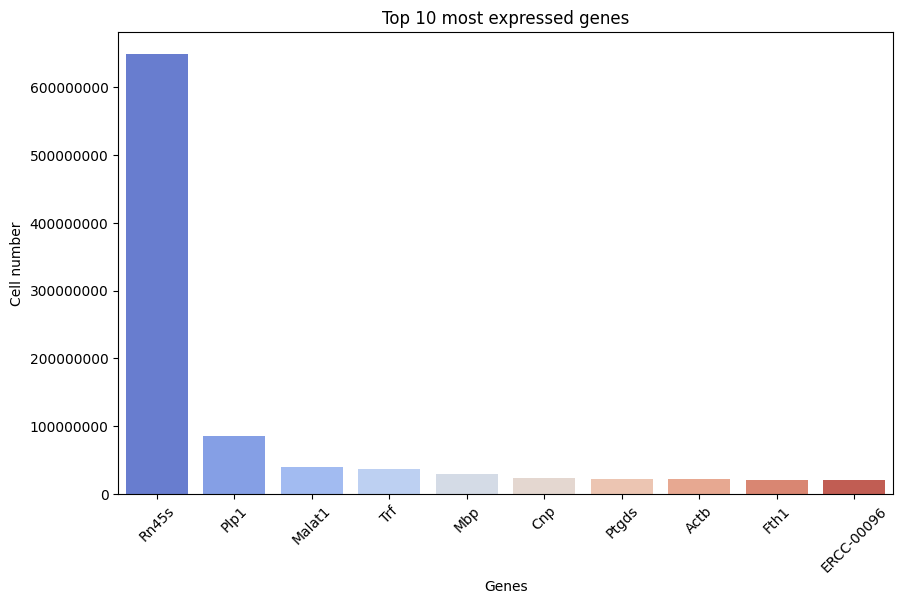

In [16]:
numeric_df_counts = df_counts.select_dtypes(include=[int, float])

top_genes = numeric_df_counts.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genes.index, y=top_genes.values, palette="coolwarm")
plt.xticks(rotation = 45)
plt.title("Top 10 most expressed genes")
plt.ylabel("Cell number")
plt.xlabel("Genes")
plt.ticklabel_format(style='plain', axis = 'y')
plt.show()


There is a top 10 less expressed genes of the sparse matrix

In [18]:
# Exclude non-numeric columns
numeric_df_counts = df_counts.select_dtypes(include=[int, float])

top_menos_genes = numeric_df_counts.sum().sort_values(ascending=True).head(100)
print("\n🔹 Top 10 less expressed genes:")
print(top_menos_genes)



🔹 Top 10 less expressed genes:
zsGreen_transgene    0
Olfr1419             0
Olfr1418             0
Olfr1416             0
Olfr1415             0
                    ..
BC048602             0
Olfr1353             0
Olfr1351             0
BC049730             0
Olfr1350             0
Length: 100, dtype: int64


In [ ]:
genes_sin_expresion = df_counts[df_counts.iloc[:,1:].sum(axis=1) == 0]
display(HTML(genes_sin_expresion.head().to_html()))

### Gene expression proportion

The pie chart represents the proportion of genes that have expression vs. do not have expression in cells.
- In this dataset, 88.8% of the genes show expression, while 11.2% do not have any expression.
- A small fraction (11.2%) of genes do not show any expression, which could indicate silenced genes, non-coding regions, or low detection sensitivity.

In [20]:
genes_without_expression = (df_counts.iloc[:, 1:].sum()== 0).sum()
genes_with_expression = (df_counts.iloc[:, 1:].sum() > 0).sum()

C:\Users\henry\AppData\Local\Temp\ipykernel_24440\1313032626.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, palette='coolwarm', ax=axes[1])


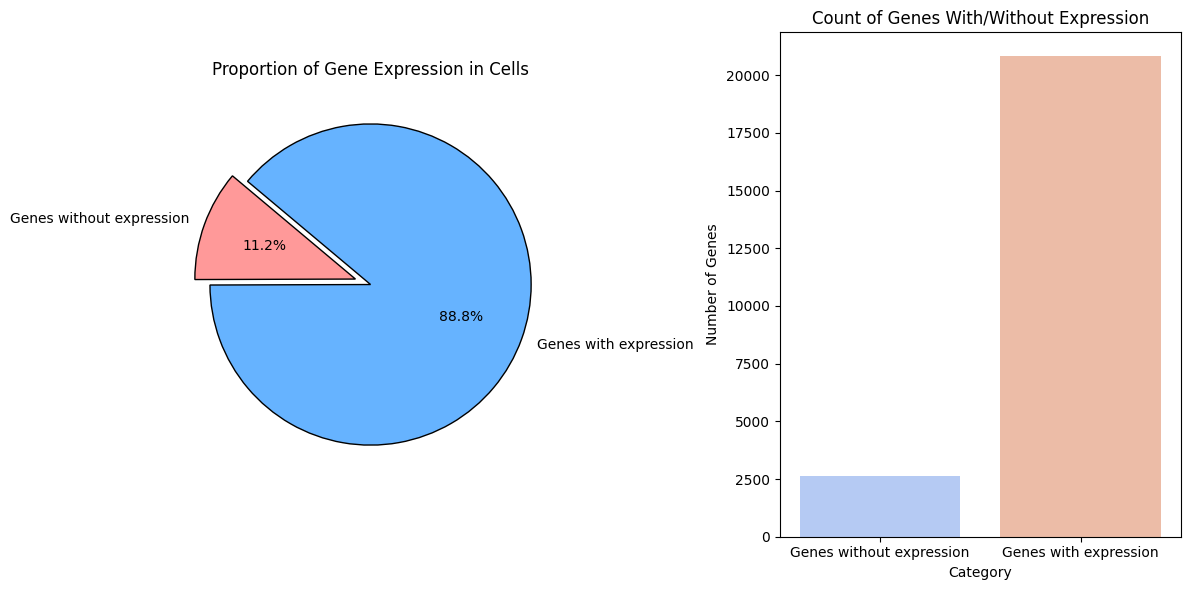

In [21]:
labels = ['Genes without expression', 'Genes with expression']
sizes = [genes_without_expression, genes_with_expression]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(
    sizes, labels=labels, colors=colors, explode=explode, 
    autopct='%1.1f%%', startangle=140, wedgeprops={"edgecolor": "black"}
)
axes[0].set_title("Proportion of Gene Expression in Cells")

# Bar plot
sns.barplot(x=labels, y=sizes, palette='coolwarm', ax=axes[1])
axes[1].set_ylabel("Number of Genes")
axes[1].set_xlabel("Category")
axes[1].set_title("Count of Genes With/Without Expression")

plt.tight_layout()
plt.show()

### Cells inspection

We analyze the behaviour or amount of gens for each cells and how is developed the total count of genes per cells.

In [ ]:

sample_df = df_counts.iloc[:5, :500]  

table = PrettyTable()
table.field_names = ["Célula"] + list(sample_df.columns)

for index, row in sample_df.iterrows():
    table.add_row([index] + list(row))

print(table)


+--------+-------------------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+-----------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+--------


### Genes count by cells

There is a top 10 of cells that have more counts of genes by itself.

**Key Observations**:
- The **highest** number of expressed genes is **9,939** in cell **H19.MAA000561.3_10_M.1.1**.
- The **lowest** number of expressed genes is **8,360** in cell **K16.MAA000930.3_8_M.1.1**.
- Most of the listed cells belong to the **MAA000561** plate, with only one cell from **MAA000930**.
- Gene expression values range from **8,360 to 9,939**, indicating variability in gene activity across cells.


In [ ]:
cell_gene_counts = (df_counts.iloc[:, 1:]>0).sum(axis=1)
top10_cells = cell_gene_counts.sort_values(ascending=False).head(10)

top10_cells_df = top10_cells.reset_index()
top10_cells_df.columns = ["Célula", "Genes expresados"]
display(HTML(top10_cells_df.to_html(index=False)))

This bar chart displays the top 10 cells with the highest number of expressed genes. The highest number of expressed genes is observed in cell H19, while the others follow closely with slightly lower counts.

C:\Users\henry\AppData\Local\Temp\ipykernel_22152\3774177792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_cells.index, y=top10_cells, palette="coolwarm")


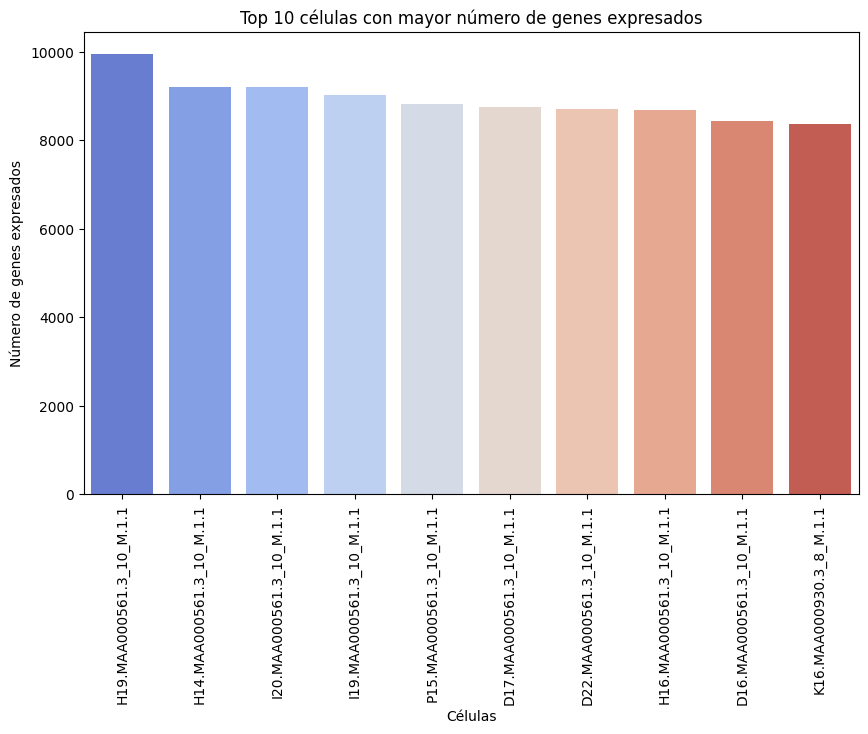

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_cells.index, y=top10_cells, palette="coolwarm")
plt.xticks(rotation = 90)
plt.xlabel("Células")
plt.ylabel("Número de genes expresados")
plt.title("Top 10 células con mayor número de genes expresados")
plt.show()